<center>***EDA for discovering Key factor responsible for app engagement and success.***</center>

Planning

Importing required libraries->Loading of datasets --> Exploring Dataset with Columns,shape,head,tail,info and describe-> Cleaning of data ( Duplicates/NaN/Null/Missing Values)-->fiiling the missing data with statistical functions->checking correaltion and trend in the data->data visualization using Graphs ->conclusion

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Loading of datasets
Source1='/Users/smilepls/project/Play-Store-App-Review-Analysis/Play Store Data.csv'
Source2='/Users/smilepls/project/Play-Store-App-Review-Analysis/User Reviews.csv'

df1=pd.read_csv(Source1)
df2=pd.read_csv(Source2)

In [4]:
 # Exploring Dataset with Columns,shape ,head,tail,info and describe
 
 df1.columns        

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [6]:
df1.shape

(10841, 13)

In [7]:
df2.shape

(64295, 5)

Description of Dataset 

1. Playstore Dataset

App- it contain name of the application 
Category- Category of Application 
Rating- User rating of application 
Reviews- No of user review per application 
Size- Memory size to install application 
Installs- No of times app installed by user
Type- It specifies version of app free /Paid 
Price- It specifies price of the App
Content Rating- it specifies user ages app was intended to make.
Genres- Subcategory for each App
Last Updated- Most updated release
Current Ver- App Current version
Android Ver- Andriod version on which App will support 

2. Review Dataset 

App- Name of the Application 
Translated_Review- Details if reviews are in other language 
Sentiment-Review sentiment type 
Sentiment_Polarity- Polarity of sentiment in Positivity or Negativity 
Sentiment_Subjectivity- subjectivity of review 


In [8]:
# Dataset Exploration 

df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df2.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [10]:
df1.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
#we can observe only rating is  Numerial data type other are object dataype .
#so we need to convert some other coloumns to numarical datatype to perform statistical analysis

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [13]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [15]:
#clean & review of data ( Duplicates/NaN/Null/Missing Values)

def review(data_toclean):
    data_toclean.drop_duplicates(inplace=True,ignore_index=True)
    data_toclean.reset_index(inplace=True,drop=True)
    blank_dataframe=pd.DataFrame()
    blank_dataframe['columns']= data_toclean.columns
    blank_dataframe['Count_of_NaN_values']= data_toclean.isnull().sum().values
    blank_dataframe['Unique_No_Of_data']= data_toclean.nunique().values
    blank_dataframe['Datatype']= data_toclean.dtypes.values
    
    return  blank_dataframe

In [16]:
Play_store_data=review(df1)
Play_store_data

,columns,Count_of_NaN_values,Unique_No_Of_data,Datatype
0,App,0,9660,object
1,Category,0,34,object
2,Rating,1465,40,float64
3,Reviews,0,6002,object
4,Size,0,462,object
5,Installs,0,22,object
6,Type,1,3,object
7,Price,0,93,object
8,Content Rating,1,6,object
9,Genres,0,120,object


In [17]:
Play_store_data1=review(df2)
Play_store_data1

,columns,Count_of_NaN_values,Unique_No_Of_data,Datatype
0,App,0,1074,object
1,Translated_Review,987,27994,object
2,Sentiment,982,3,object
3,Sentiment_Polarity,982,6195,float64
4,Sentiment_Subjectivity,982,4530,float64


In [18]:
# cleaning unwanted elements 

def clean(dataset,data_frame):
  if dataset.isnull().sum()==1:
    data_frame.drop(data_frame.index[data_frame[dataset.isnull()].index],axis=0,inplace=True)
  else:
    data_frame.dropna(inplace=True,axis=0, thresh=5)
    data_frame.reset_index(inplace=True,drop=True)
  if dataset.isna and dataset.dtype==float:
    dataset.fillna(dataset.median(),inplace=True)
  return data_frame
    
def remove_change(dataset,data_frame,change='',replace=''):
  if dataset.dtype==object:
    dataset=dataset.apply(lambda x: str(x).replace(change,replace) if change in str(x) else x )
    return dataset

***Cleaning of Play store Dataset ***

In [19]:
#cleaning Content Rating
clean(df1['Content Rating'],df1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
clean(df1['Type'],df1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [21]:
#clean Rating Coloumn
clean(df1['Rating'],df1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10353,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10354,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
#clean Review Coloumn
df1['Reviews']=df1['Reviews'].apply(lambda x:float(x))
clean(df1['Reviews'],df1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10353,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10354,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [23]:
# cleaning Size coloumns
df1['Size']=remove_change(df1['Size'],df1,'Varies with device','NaN')
df1['Size']=remove_change(df1['Size'],df1,'M','')
df1['Size']=remove_change(df1['Size'],df1,',','')
df1['Size']=remove_change(df1['Size'],df1,'+','')
# converting KB to MB 
df1['Size']=df1['Size'].apply(lambda x: float(str(x).replace('k','')) / 1024 if 'k' in str(x) else x)
df1['Size']=df1['Size'].apply(lambda x:float(x))
clean(df1['Size'],df1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10353,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10354,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,13.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
#cleaning Install coloumn
df1['Installs']=remove_change(df1['Installs'],df1,'+','')
df1['Installs']=remove_change(df1['Installs'],df1,',','')
df1['Installs']=remove_change(df1['Installs'],df1,'Free','NaN')

df1['Installs']=df1['Installs'].apply(lambda x:float(x))
clean(df1['Installs'],df1)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10353,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10354,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,13.0,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
# cleaning price coloumn
df1['Price']=remove_change(df1['Price'],df1,'$','')
df1['Price']=df1['Price'].apply(lambda x:float(x))
clean(df1['Price'],df1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10353,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10354,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,13.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10356.000000,1.035600e+04,10356.000000,1.035600e+04,10356.000000
mean,4.203727,4.059438e+05,20.067028,1.415913e+07,1.030900
std,0.485617,2.696905e+06,21.020893,8.024331e+07,16.279408
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.300000,1.683000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.643825e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [27]:
review(df1)

,columns,Count_of_NaN_values,Unique_No_Of_data,Datatype
0,App,0,9658,object
1,Category,0,33,object
2,Rating,0,39,float64
3,Reviews,0,6001,float64
4,Size,0,459,float64
5,Installs,0,20,float64
6,Type,0,2,object
7,Price,0,92,float64
8,Content Rating,0,6,object
9,Genres,0,119,object


***Cleaning of review dataset***

In [28]:
# cleaning of reveiw dataset
clean(df2['Sentiment'],df2)
review(df2)

,columns,Count_of_NaN_values,Unique_No_Of_data,Datatype
0,App,0,865,object
1,Translated_Review,0,27994,object
2,Sentiment,0,3,object
3,Sentiment_Polarity,0,6195,float64
4,Sentiment_Subjectivity,0,4530,float64


*** Merging of clean dataset for detailed analysis***

In [29]:
# use of inner join
combined_dataset=pd.merge(df2,df1,how='inner',on='App')
combined_dataset=combined_dataset.dropna()
combined_dataset


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40409,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
40410,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
40411,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
40412,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up


In [30]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40414 entries, 0 to 40413
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40414 non-null  object 
 1   Translated_Review       40414 non-null  object 
 2   Sentiment               40414 non-null  object 
 3   Sentiment_Polarity      40414 non-null  float64
 4   Sentiment_Subjectivity  40414 non-null  float64
 5   Category                40414 non-null  object 
 6   Rating                  40414 non-null  float64
 7   Reviews                 40414 non-null  float64
 8   Size                    40414 non-null  float64
 9   Installs                40414 non-null  float64
 10  Type                    40414 non-null  object 
 11  Price                   40414 non-null  float64
 12  Content Rating          40414 non-null  object 
 13  Genres                  40414 non-null  object 
 14  Last Updated            40414 non-null

In [31]:
# since user always use current version so we can drop the android and current version from dataset.
combined_dataset.drop(['Android Ver','Current Ver'],axis=1,inplace=True )
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40414 entries, 0 to 40413
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40414 non-null  object 
 1   Translated_Review       40414 non-null  object 
 2   Sentiment               40414 non-null  object 
 3   Sentiment_Polarity      40414 non-null  float64
 4   Sentiment_Subjectivity  40414 non-null  float64
 5   Category                40414 non-null  object 
 6   Rating                  40414 non-null  float64
 7   Reviews                 40414 non-null  float64
 8   Size                    40414 non-null  float64
 9   Installs                40414 non-null  float64
 10  Type                    40414 non-null  object 
 11  Price                   40414 non-null  float64
 12  Content Rating          40414 non-null  object 
 13  Genres                  40414 non-null  object 
 14  Last Updated            40414 non-null

*** EDA of datasets***


after cleaning and combining ,we will do Univariate/Multivariate study and exploratory Analyisis on the individual dataset .


KPI - Rating , Review , Size ,Installs and Price 

Google play has grouped the apps into  categories and Genres for better visibility.we can do indepth study for understanding the engagement of the apps in the category and generes .

a. Top 10 category which contain max no of apps
b. Top 5 genres which contain maximum number of apps
c. Top 10 category which contain max no of free Apps
d. Top 5 categoies which contain expensive Apps
e. which categories of apps are less popular.
f. Top 10 genres which apps are installed mostly.
g. Top 10 genres which contain max no of paid Apps
h. which app contain max no of installs


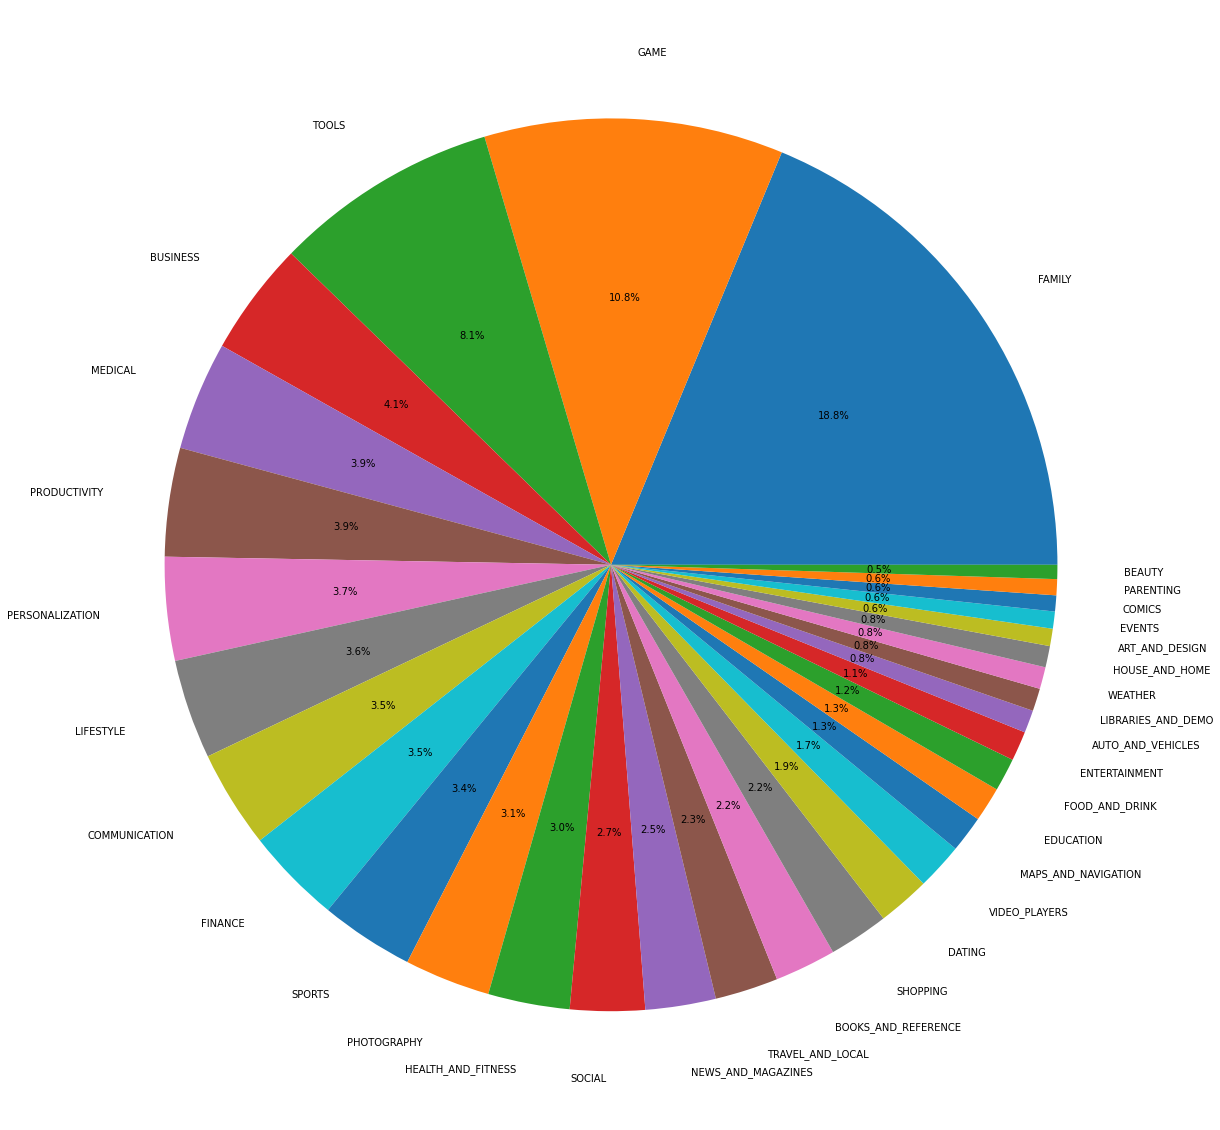

In [32]:
# a. Top 10 category which contain max no of apps

plt.rcParams["figure.figsize"] = (20,60)
# Create a pieplot
plt.pie(df1['Category'].value_counts(),labels=df1['Category'].value_counts().index, labeldistance=1.15,autopct="%.1f%%");
plt.show();



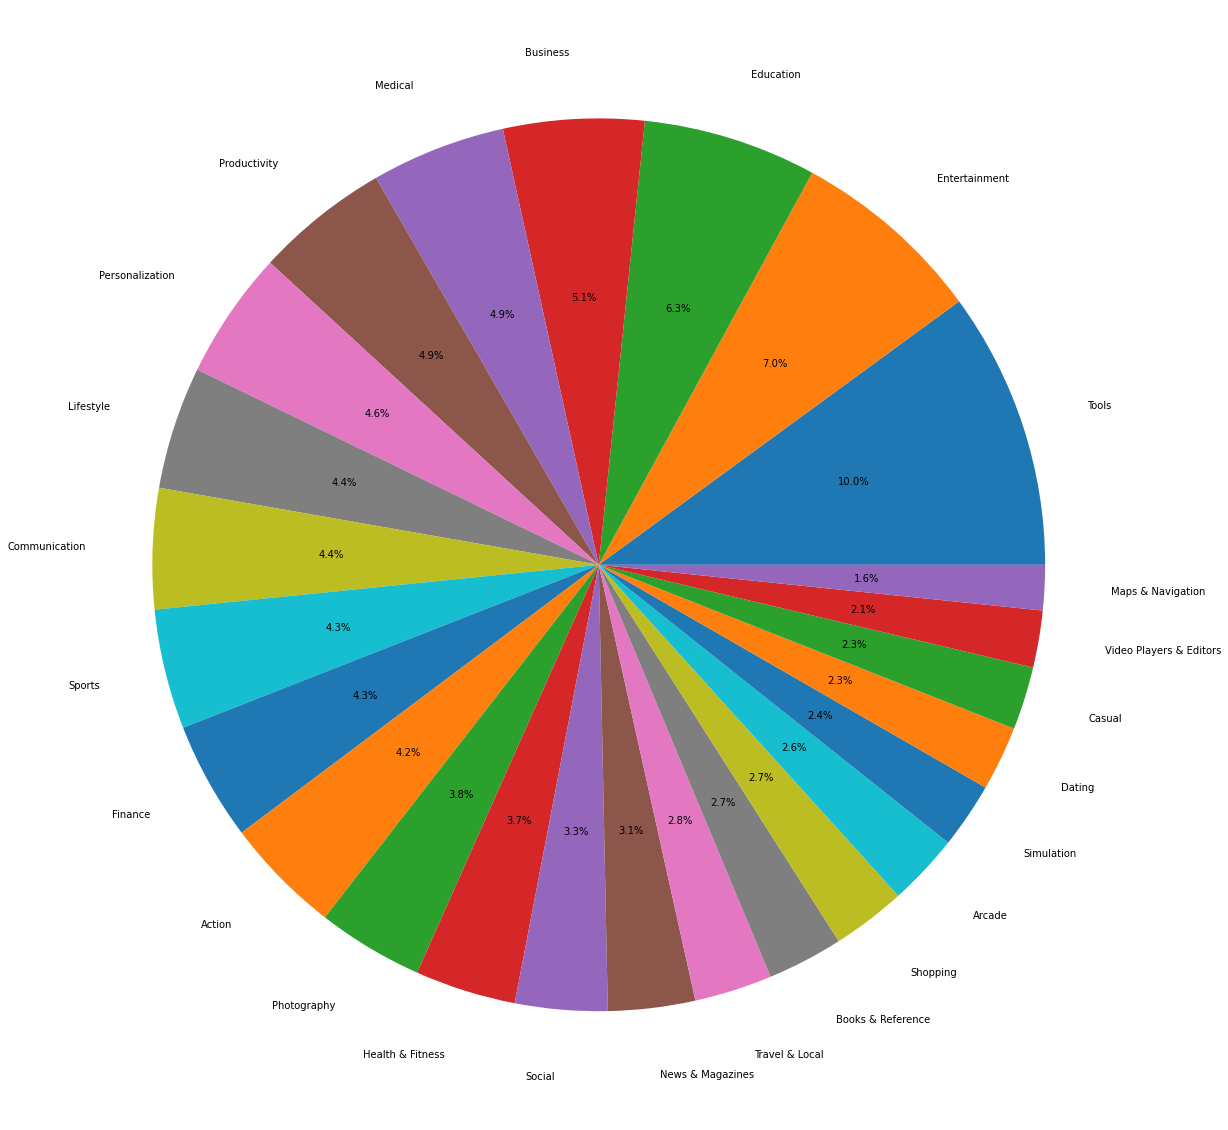

In [33]:
#b. Top 10 Genres which contain max no of apps
genres_app=df1.groupby('Genres')['App'].count().sort_values(ascending=False).head(25)
plt.rcParams["figure.figsize"] = (20,60)
# Create a pieplot
plt.pie(genres_app,labels=genres_app.index, labeldistance=1.15,autopct="%.1f%%");
plt.show();




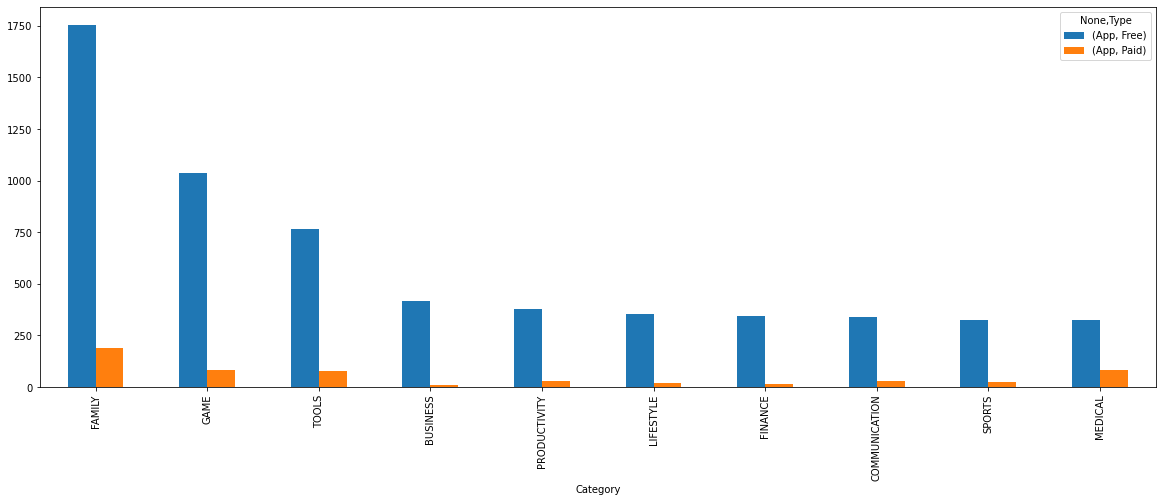

In [34]:
#c. Top 10 category which contain max no of free Apps

Category_type=df1.groupby(['Category','Type'])[['App']].count().unstack().sort_values(by=[('App', 'Free')],ascending=False).head(10)
Category_type.plot(kind='bar',stacked=False, figsize=(20,7))



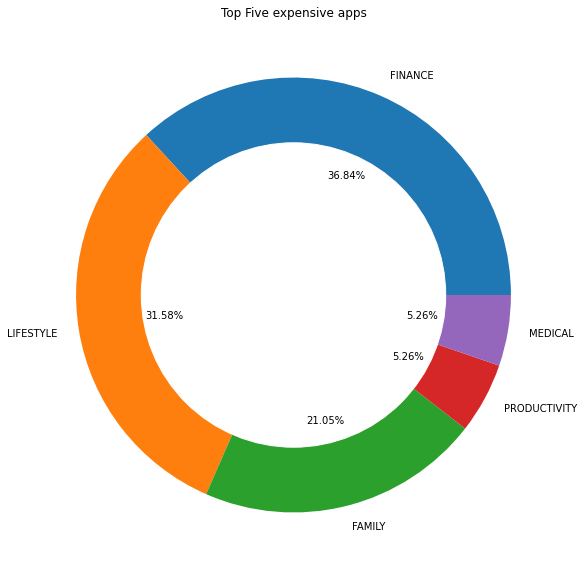

In [35]:
#d. Top 5 categoies which contain expensive Apps so wthat we can plan for pricing strategy

plt.figure(figsize=(40,10))
plt.pie(df1[df1.Price>120].Category.value_counts(),labels=df1[df1.Price>120].Category.value_counts().index, autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top Five expensive apps')
plt.show()


In [36]:
# mean value of Rating is 4.2
df1['Rating'].mean()

4.203727307840972

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

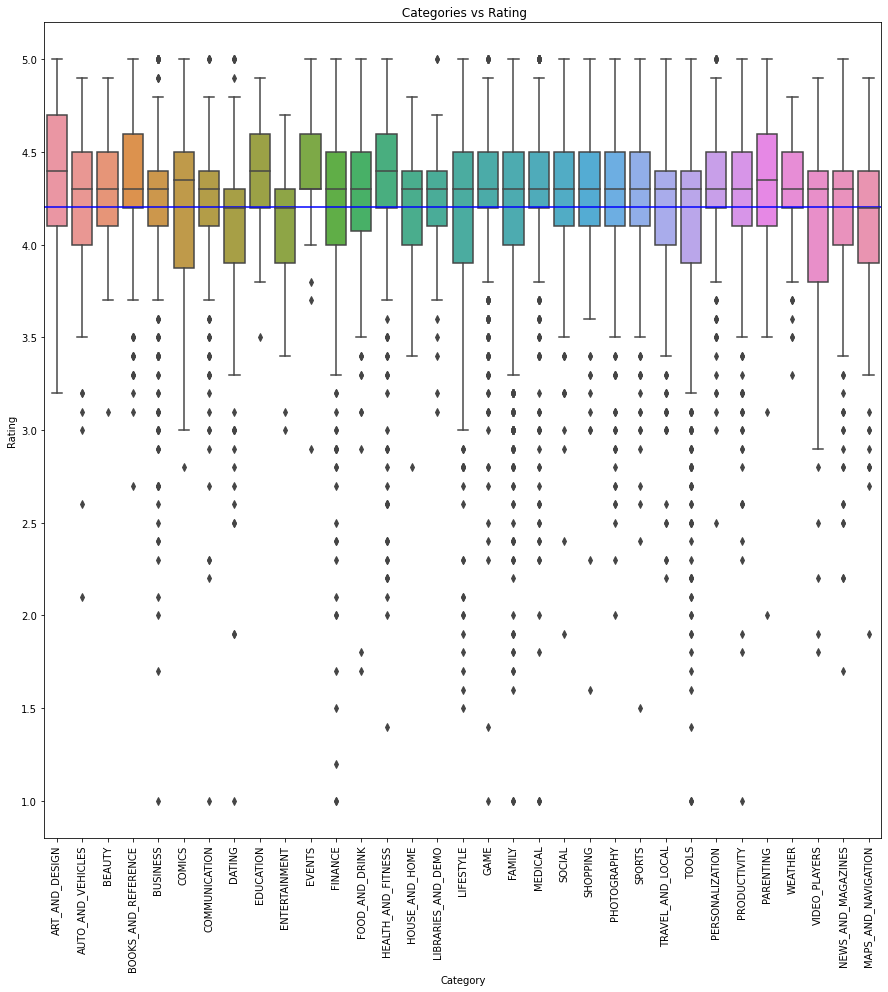

In [37]:
#e. which categories of apps are less popular.- Dating , Entertainment ,Maps & Nevigation
plt.figure(figsize=(15,15))
val = sns.boxplot(data=df1, x="Category", y="Rating")
val.axhline(df1['Rating'].mean(),ls="solid",color="blue")
plt.title(' Categories vs Rating')
plt.xticks(rotation=90)

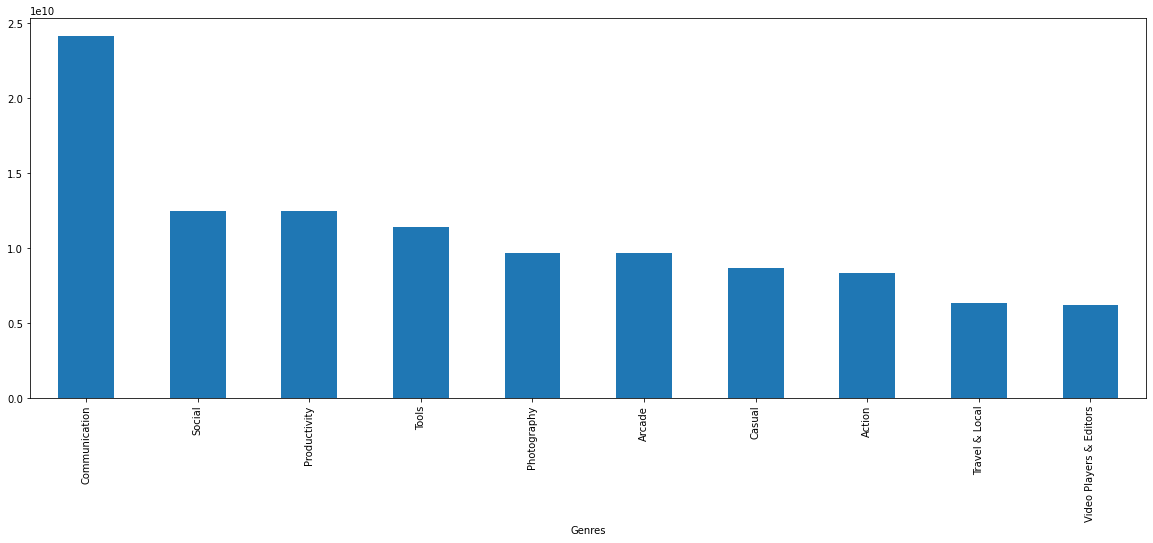

In [38]:
# f. Top 10 genres which apps are installed mostly.

Genres_type=df1.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)
Genres_type.plot(kind='bar',stacked=False, figsize=(20,7))


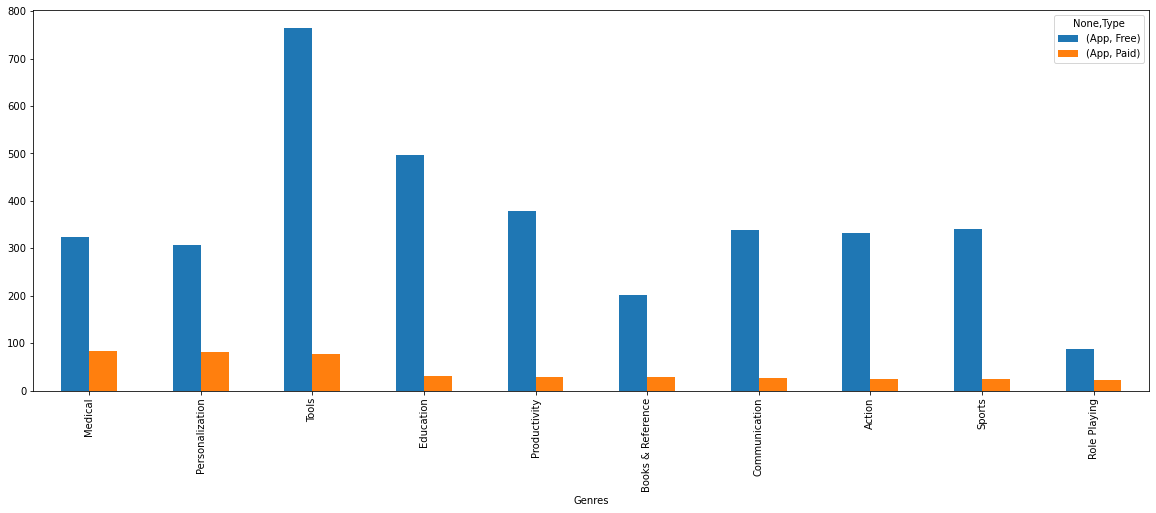

In [39]:
# g. Top 10 genres which contain max no of paid Apps

genres_type1=df1.groupby(['Genres','Type'])[['App']].count().unstack().sort_values(by=[('App', 'Paid')],ascending=False).head(10)
genres_type1.plot(kind='bar',stacked=False, figsize=(20,7))


In [45]:
#h. which app contain max no of installs

# we can check what is max install of App through describe function or by boxplot .
df1.Installs.describe()

count    1.035600e+04
mean     1.415913e+07
std      8.024331e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [57]:
df1[df1.Installs>=1.000000e+09].sort_values(by='Installs',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,13.0,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
2731,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689.0,13.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
2816,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707.0,13.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
2818,Google,TOOLS,4.4,8033493.0,13.0,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3035,Google Drive,PRODUCTIVITY,4.4,2731171.0,13.0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3102,Google Drive,PRODUCTIVITY,4.4,2731211.0,13.0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3239,YouTube,VIDEO_PLAYERS,4.3,25655305.0,13.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
3261,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,13.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
3310,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13.0,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3372,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13.0,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
